In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('/content/shopping mall.csv')


df.head()

Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  
0              89  
1              95  
2              76  
3              57  
4              76

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/content/shopping mall.csv')
df = df.drop(columns=['Customer ID'])
df['Annual Income'] = df['Annual Income'] / 1000
df.describe()

Age  Annual Income  Spending Score
count  15079.000000   15079.000000    15079.000000
mean      54.191591     109.742881       50.591617
std       21.119207      52.249426       28.726977
min       18.000000      20.022000        1.000000
25%       36.000000      64.141000       26.000000
50%       54.000000     109.190000       51.000000
75%       72.000000     155.008000       75.000000
max       90.000000     199.974000      100.000000

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = "1"

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('/content/shopping mall.csv')
df = df.drop(columns=['Customer ID'])
df['Annual Income'] = df['Annual Income'] / 1000



df.isnull().sum()

Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

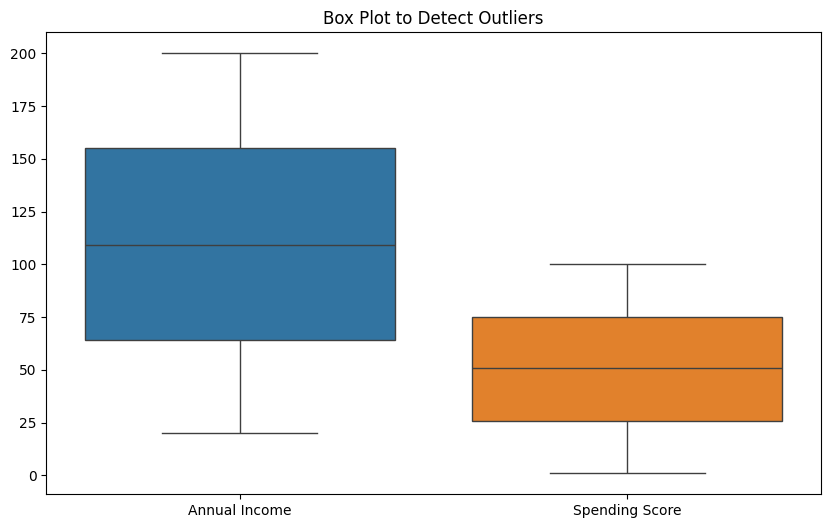

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = "1"

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('/content/shopping mall.csv')
df = df.drop(columns=['Customer ID'])
df['Annual Income'] = df['Annual Income'] / 1000


plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Annual Income', 'Spending Score']])
plt.title('Box Plot to Detect Outliers')
plt.show()



In [ ]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('/content/shopping mall.csv')
df.head()
df = df.drop(columns=['Customer ID'])



print("Unique values in Gender before processing", df['Gender'].unique())
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
print("Unique values in Gender after processing", df['Gender'].unique())

Unique values in Gender before processing ['Male' 'Female']
Unique values in Gender after processing [1 0]


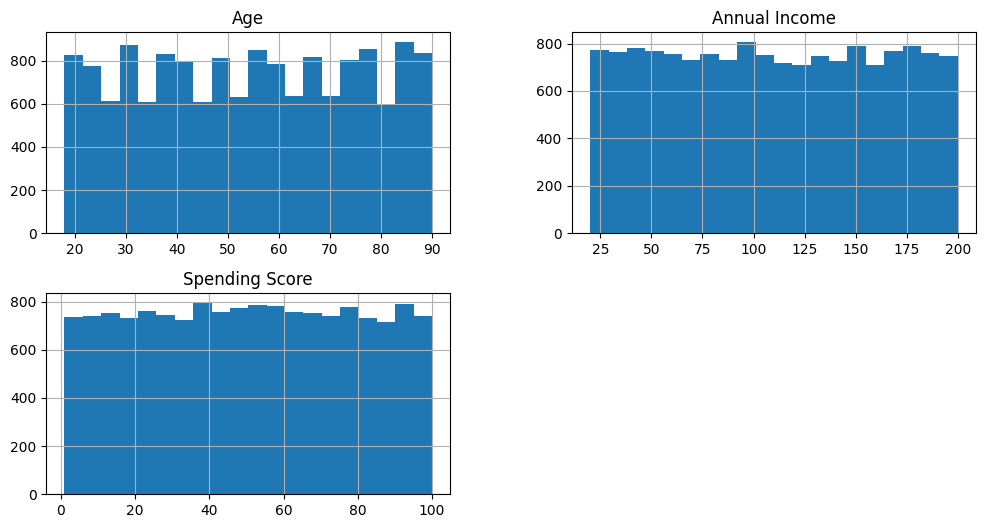

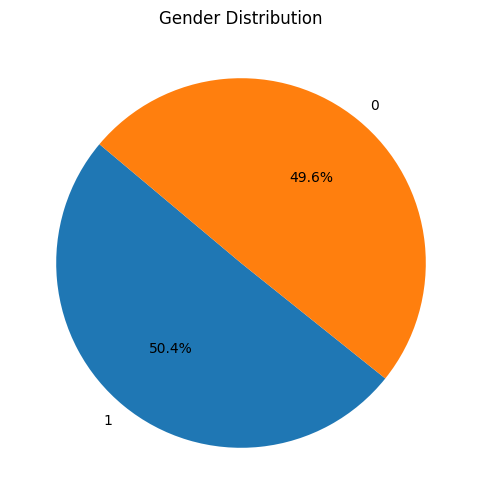

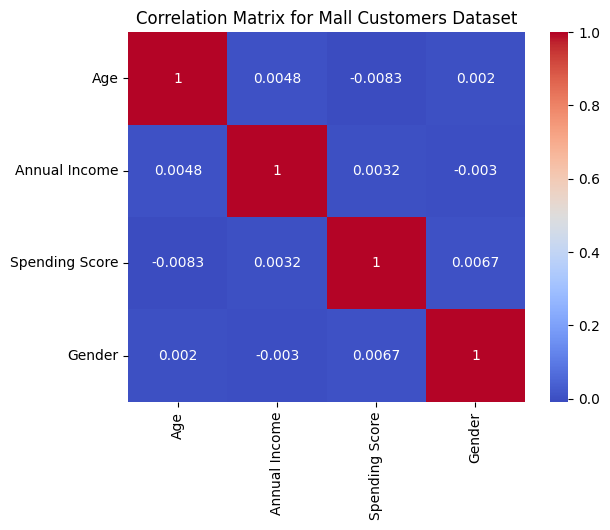

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = "1"

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('/content/shopping mall.csv')
df = df.drop(columns=['Customer ID'])
df['Annual Income'] = df['Annual Income'] / 1000
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])



df[['Age', 'Annual Income', 'Spending Score']].hist(bins=20, figsize=(12, 6))
plt.show()
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()



numerical_df = df[['Age', 'Annual Income', 'Spending Score', 'Gender']]

corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Mall Customers Dataset")
plt.show()


from sklearn.preprocessing import StandardScaler

features = df[['Annual Income', 'Spending Score']]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(features)




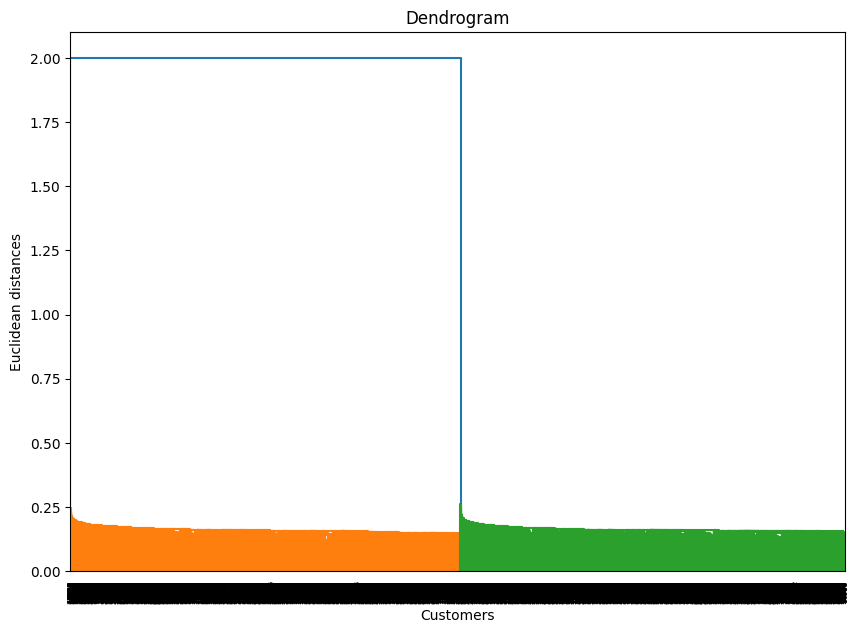

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import os
os.environ["OMP_NUM_THREADS"] = "1"

df = pd.read_csv('/content/shopping mall.csv')
df.head()
df = df.drop(columns=['Customer ID'])
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])



X = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


linked = linkage(X_scaled, method='single')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


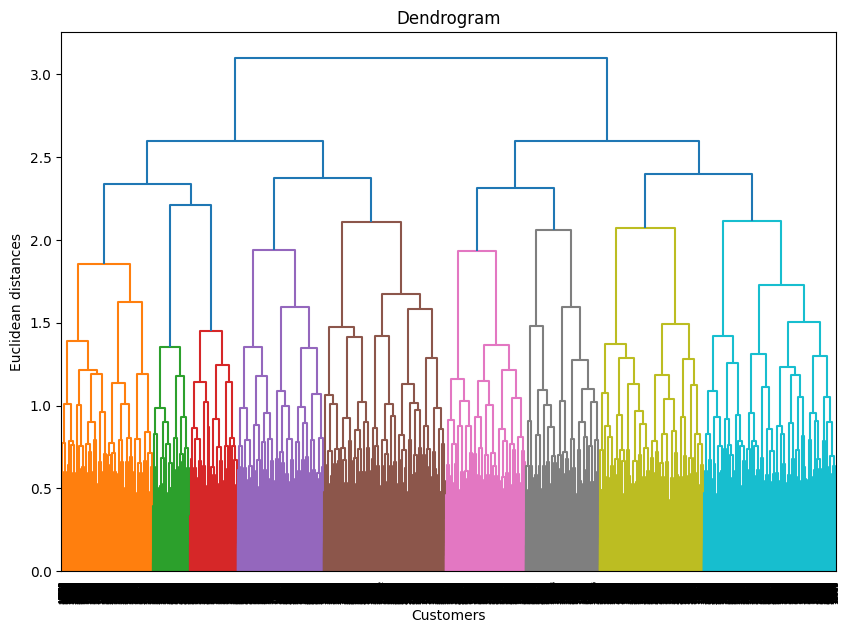

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import os
os.environ["OMP_NUM_THREADS"] = "1"

df = pd.read_csv('/content/shopping mall.csv')
df.head()
df = df.drop(columns=['Customer ID'])
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])



X = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


linked = linkage(X_scaled, method='average')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

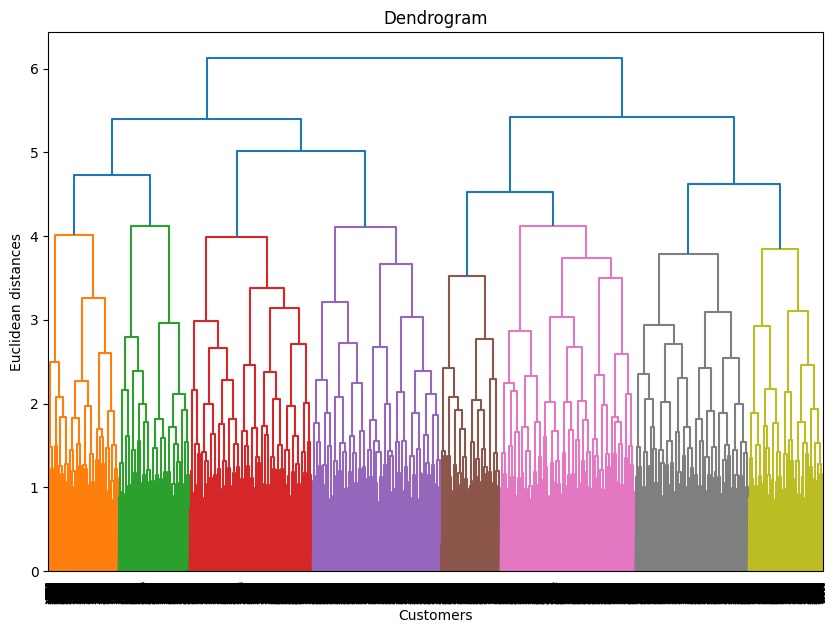

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import os
os.environ["OMP_NUM_THREADS"] = "1"

df = pd.read_csv('/content/shopping mall.csv')
df.head()
df = df.drop(columns=['Customer ID'])
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])



X = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


linked = linkage(X_scaled, method='complete')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


Unique values in Gender after encoding: [1 0]


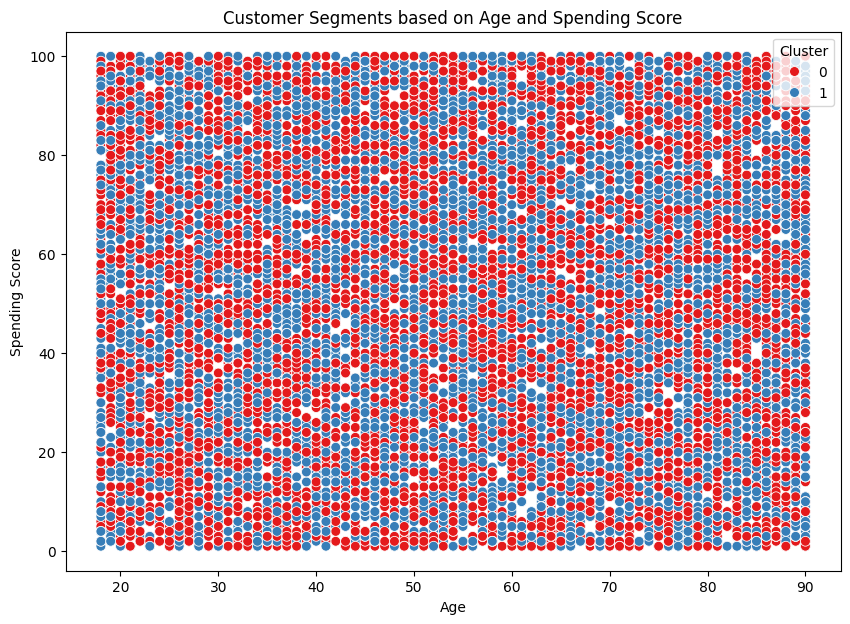

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv('/content/shopping mall.csv')
df.head()
df = df.drop(columns=['Customer ID'])
df['Annual Income'] = df['Annual Income'] / 1000
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

print("Unique values in Gender after encoding:", df['Gender'].unique())
X = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]



n_clusters = 2
hc_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')


cluster_assignments = hc_model.fit_predict(X_scaled)
df['Cluster'] = cluster_assignments
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['Age'], y=df['Spending Score'], hue=df['Cluster'], palette='Set1', s=50)
plt.title('Customer Segments based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

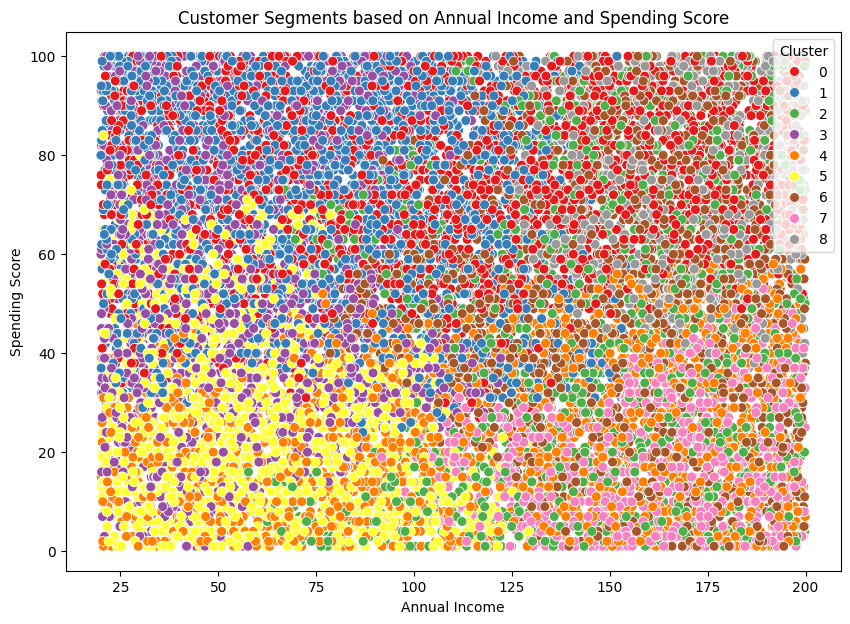

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/shopping mall.csv')
df.head()

df = df.drop(columns=['Customer ID'])
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Annual Income'] = df['Annual Income'] / 1000


X = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 9
hc_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')


cluster_assignments = hc_model.fit_predict(X_scaled)
df['Cluster'] = cluster_assignments


plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['Annual Income'], y=df['Spending Score'], hue=df['Cluster'], palette='Set1', s=50)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()


   Age  Gender  Annual Income  Spending Score  Cluster
0   30       1        151.479              89        4
1   58       0        185.088              95        3
2   62       0         70.912              76        0
3   23       1         55.460              57        6
4   24       1        153.752              76        4


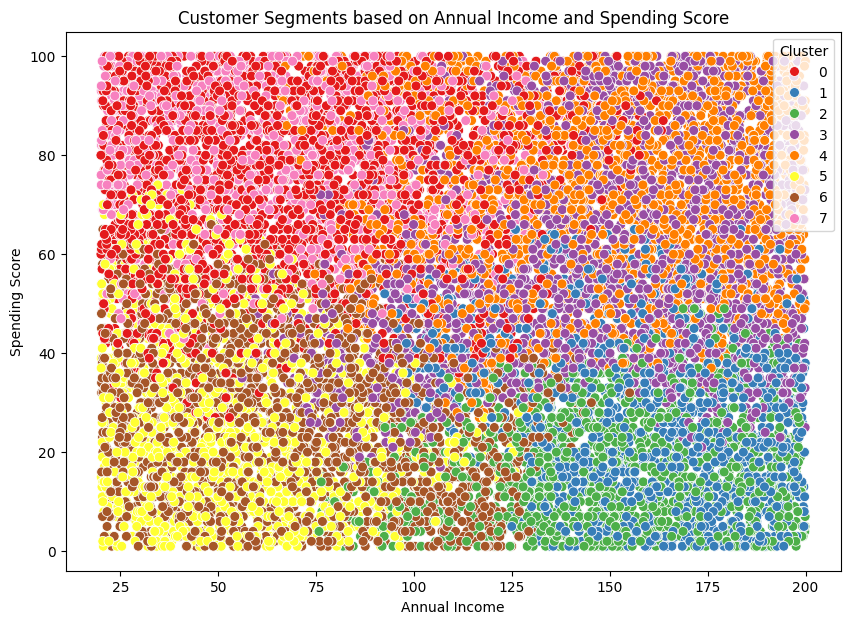

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/shopping mall.csv')
df.head()

df = df.drop(columns=['Customer ID'])
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Annual Income'] = df['Annual Income'] / 1000


X = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 8
hc_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')


cluster_assignments = hc_model.fit_predict(X_scaled)
df['Cluster'] = cluster_assignments

print(df[['Age', 'Gender', 'Annual Income', 'Spending Score', 'Cluster']].head())


plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['Annual Income'], y=df['Spending Score'], hue=df['Cluster'], palette='Set1', s=50)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()


   Age  Gender  Annual Income  Spending Score  Cluster
0   30       1        151.479              89        0
1   58       0        185.088              95        0
2   62       0         70.912              76        2
3   23       1         55.460              57        3
4   24       1        153.752              76        0


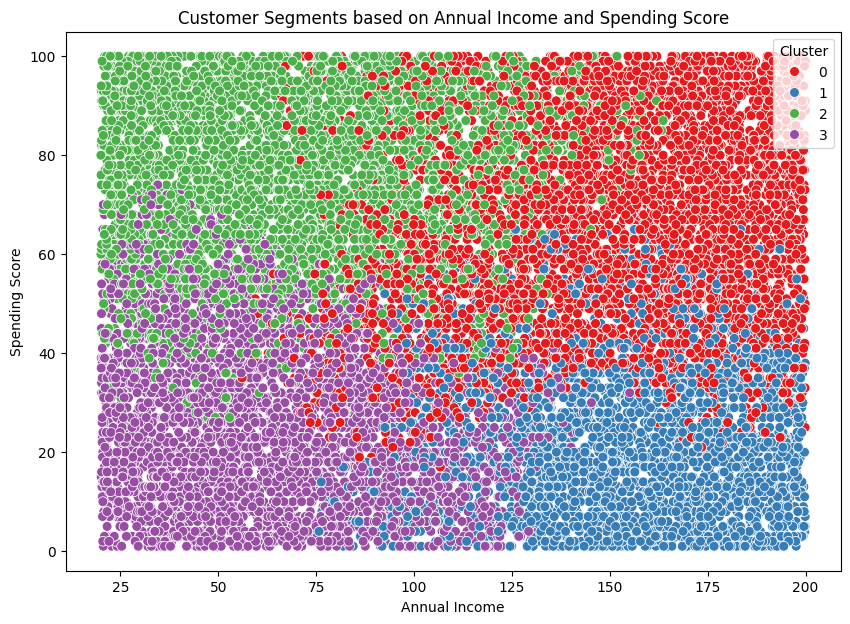

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/shopping mall.csv')
df.head()

df = df.drop(columns=['Customer ID'])
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Annual Income'] = df['Annual Income'] / 1000


X = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 4
hc_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')


cluster_assignments = hc_model.fit_predict(X_scaled)
df['Cluster'] = cluster_assignments

print(df[['Age', 'Gender', 'Annual Income', 'Spending Score', 'Cluster']].head())


plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['Annual Income'], y=df['Spending Score'], hue=df['Cluster'], palette='Set1', s=50)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

   Age  Gender  Annual Income  Spending Score  Cluster
0   30       1        151.479              89        4
1   58       0        185.088              95        3
2   62       0         70.912              76        0
3   23       1         55.460              57        6
4   24       1        153.752              76        4


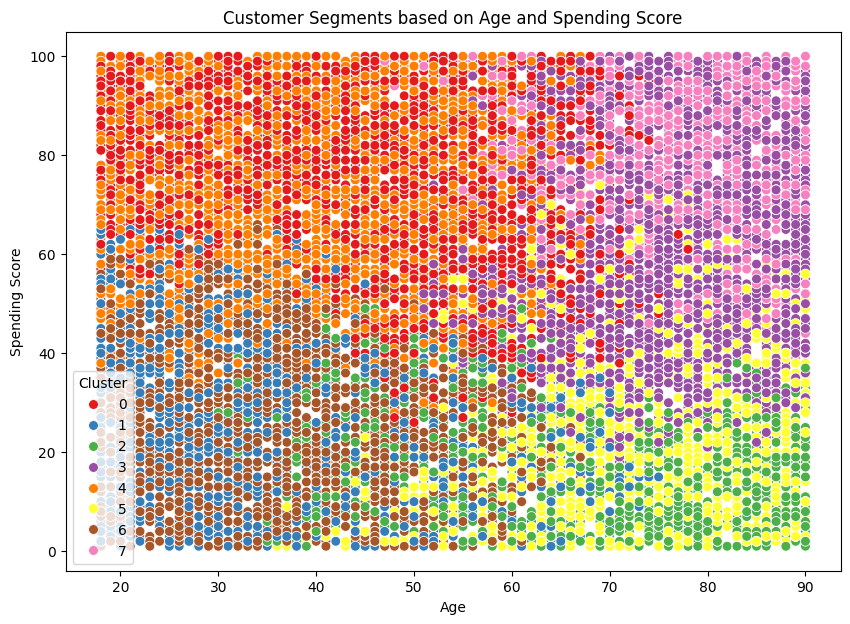

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/shopping mall.csv')
df.head()

df = df.drop(columns=['Customer ID'])
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Annual Income'] = df['Annual Income'] / 1000


X = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 8
hc_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')


cluster_assignments = hc_model.fit_predict(X_scaled)
df['Cluster'] = cluster_assignments
print(df[['Age', 'Gender', 'Annual Income', 'Spending Score', 'Cluster']].head())



plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['Age'], y=df['Spending Score'], hue=df['Cluster'], palette='Set1', s=50)
plt.title('Customer Segments based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()


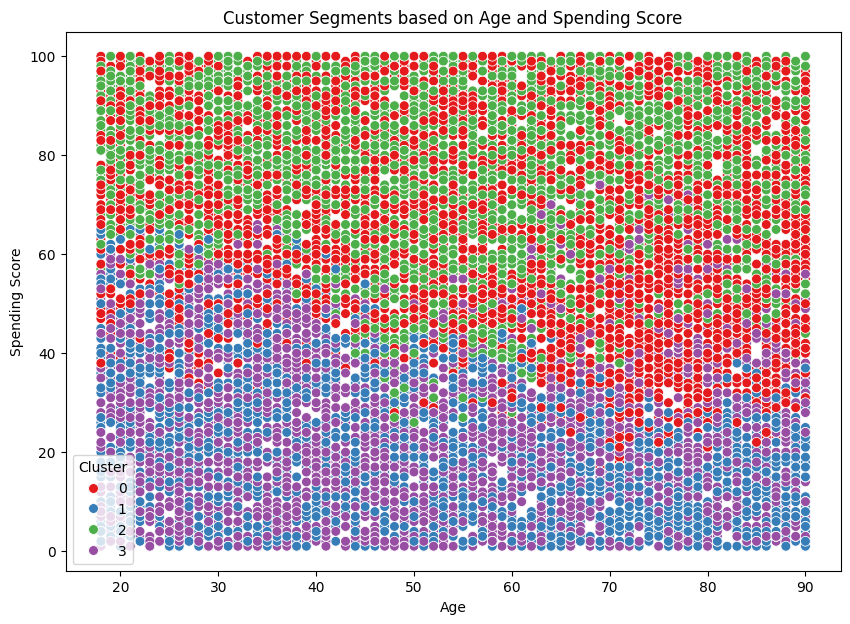

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/shopping mall.csv')
df.head()

df = df.drop(columns=['Customer ID'])
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Annual Income'] = df['Annual Income'] / 1000


X = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 4
hc_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')


cluster_assignments = hc_model.fit_predict(X_scaled)
df['Cluster'] = cluster_assignments


plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['Age'], y=df['Spending Score'], hue=df['Cluster'], palette='Set1', s=50)
plt.title('Customer Segments based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()


   Age  Gender  Annual Income  Spending Score  Cluster
0   30       1        151.479              89        0
1   58       0        185.088              95        0
2   62       0         70.912              76        2
3   23       1         55.460              57        3
4   24       1        153.752              76        0


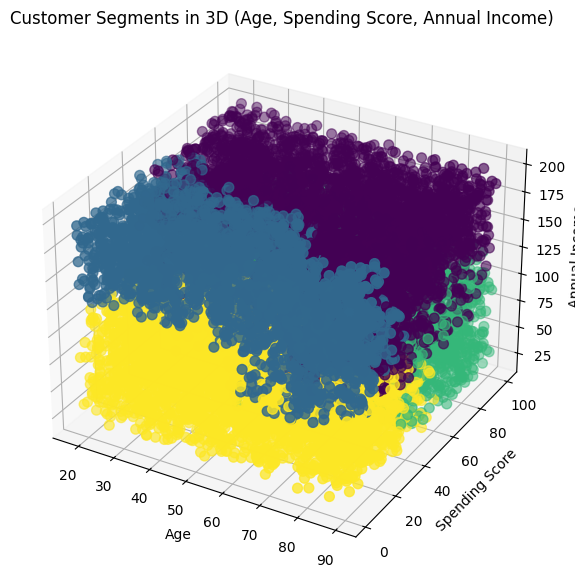

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('/content/shopping mall.csv')
df.head()

df = df.drop(columns=['Customer ID'])
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Annual Income'] = df['Annual Income'] / 1000


X = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 4
hc_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')


cluster_assignments = hc_model.fit_predict(X_scaled)
df['Cluster'] = cluster_assignments
print(df[['Age', 'Gender', 'Annual Income', 'Spending Score', 'Cluster']].head())

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['Spending Score'], df['Annual Income'], c=df['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')
plt.title('Customer Segments in 3D (Age, Spending Score, Annual Income)')
plt.show()



   Age  Gender  Annual Income  Spending Score  Cluster
0   30       1        151.479              89        4
1   58       0        185.088              95        3
2   62       0         70.912              76        2
3   23       1         55.460              57        1
4   24       1        153.752              76        4


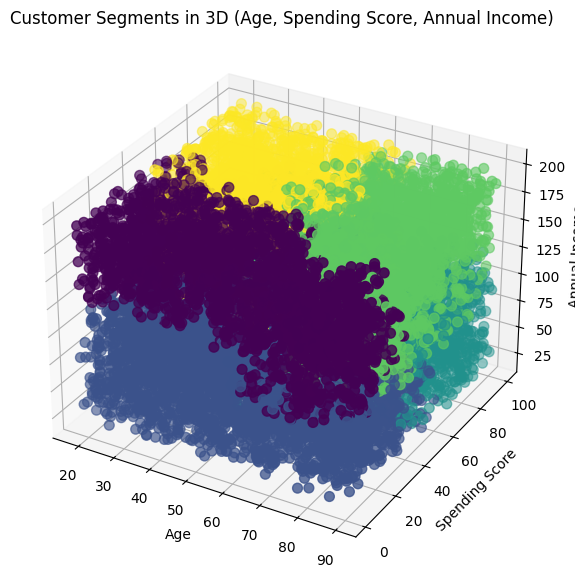

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('/content/shopping mall.csv')
df.head()

df = df.drop(columns=['Customer ID'])
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Annual Income'] = df['Annual Income'] / 1000


X = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 5
hc_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')


cluster_assignments = hc_model.fit_predict(X_scaled)
df['Cluster'] = cluster_assignments
print(df[['Age', 'Gender', 'Annual Income', 'Spending Score', 'Cluster']].head())

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['Spending Score'], df['Annual Income'], c=df['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')
plt.title('Customer Segments in 3D (Age, Spending Score, Annual Income)')
plt.show()

